# Using Logistic Regression model to predict Graduate Admissions

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing pandas,numpy,seaborn,matplotlib.pyplot

In [114]:
import warnings
warnings.filterwarnings("ignore") #ignores warnings

In [115]:
df = pd.read_csv(r"C:\Users\nimra\Downloads\archive\Admission_Predict_Ver1.1.csv")
df
#reading csv file and storing in dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [116]:
pwd #present working directory

'C:\\Users\\nimra'

# Data Exploration

In [117]:
df.head() #starting 5 values

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [118]:
df.tail() #ending 5 values

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [119]:
df.sample() #gives any random sample value from df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
147,148,326,114,3,3.0,3.0,9.11,1,0.83


In [120]:
df.shape #shape of dataframe

(500, 9)

In [121]:
df.columns #column names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [122]:
df.dtypes #tells datatypes of each column

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [123]:
df.info() #concise summary of the dataframe includes column name null and non null count and data types
#no null values, no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [124]:
df.describe()
#mean and median is same 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data Cleaning

In [125]:
df = df.drop(['Serial No.'], axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [126]:
df.isnull().sum() #no null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [127]:
df.duplicated().sum()

0

In [128]:
column_name = 'GRE Score'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

Series([], Name: GRE Score, dtype: int64)


In [129]:
column_name = 'TOEFL Score'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

Series([], Name: TOEFL Score, dtype: int64)


In [130]:
column_name = 'University Rating'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

Series([], Name: University Rating, dtype: int64)


In [131]:
column_name = 'SOP'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

0      4.5
1      4.0
2      3.0
3      3.5
4      2.0
      ... 
495    4.5
496    5.0
497    4.5
498    4.0
499    4.5
Name: SOP, Length: 500, dtype: float64


In [132]:
column_name = 'CGPA'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

0      9.65
1      8.87
2      8.00
3      8.67
4      8.21
       ... 
495    9.02
496    9.87
497    9.56
498    8.43
499    9.04
Name: CGPA, Length: 500, dtype: float64


In [133]:
column_name = 'Research'

has_special_characters = df[df[column_name].notnull() & df[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

Series([], Name: Research, dtype: int64)


from above we can see that there is no special characters present in the dataset

# Data Visualization

Correlation among variables

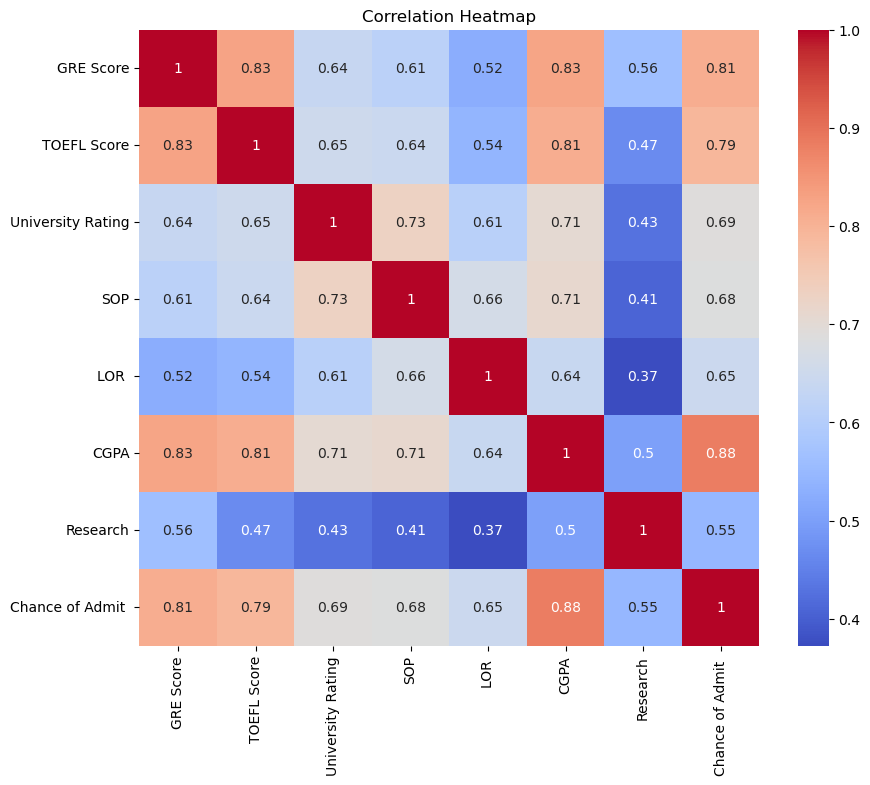

In [134]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the size of the figure
# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()

from the above correlation we can see which feature is how much related to the other feature

Lets see the distribution of the variables of graduate applicants.

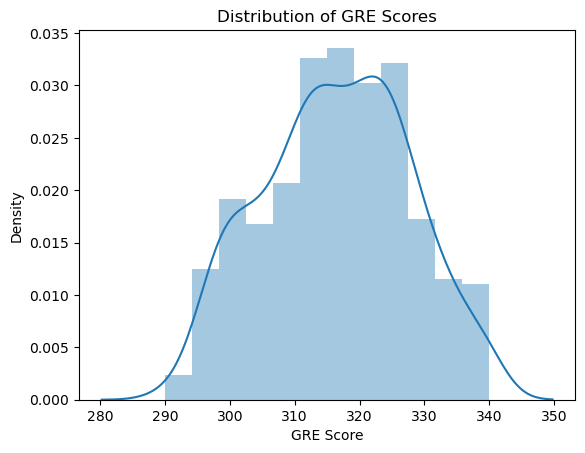

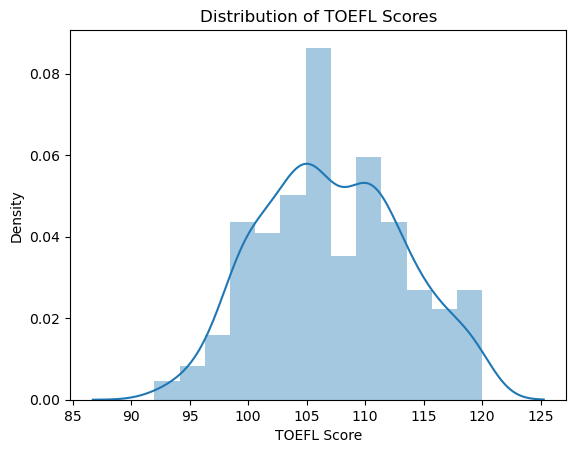

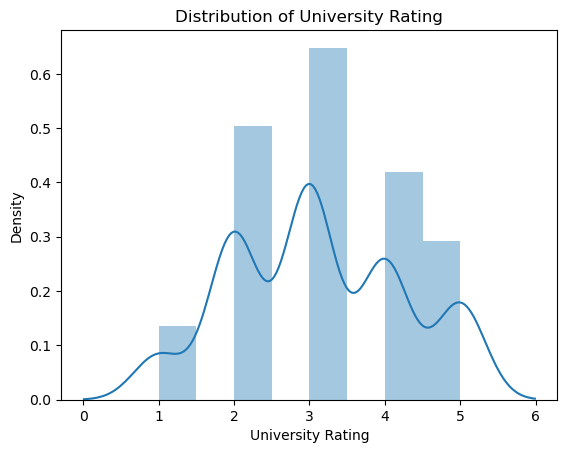

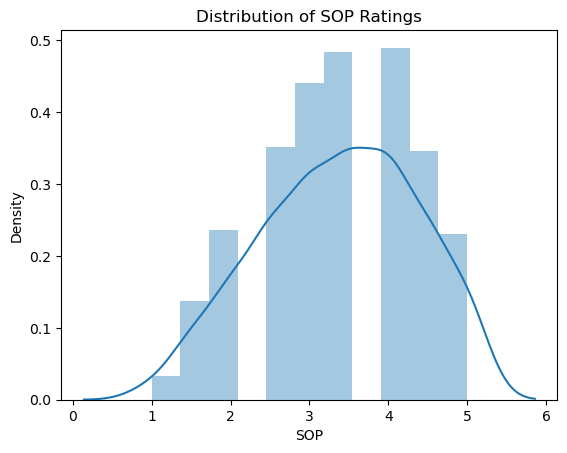

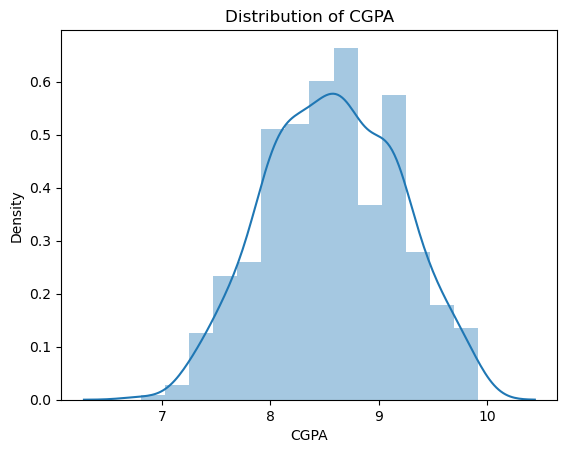

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

we can see that various types of students applied and the grades are not normally distributed

### Understanding the relation between different factors responsible for graduate admissions

In [136]:
df.columns #column names or features

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

GRE Score: The GRE (Graduate Record Examination) is a standardized test commonly required for admission to graduate programs, including Master's degree programs. It assesses a student's analytical writing, verbal reasoning, and quantitative reasoning skills. GRE scores are reported on a scale of 130 to 170 for each section.

TOEFL Score: The TOEFL (Test of English as a Foreign Language) is a standardized test used to evaluate the English language proficiency of non-native English speakers. It is required for admission to universities in English-speaking countries. TOEFL scores are reported on a scale of 0 to 120.

University Rating: This represents the ranking or reputation of the university where the applicant completed or is completing their undergraduate studies. University ratings are often provided on a scale of 1 to 5, with 1 being the lowest and 5 being the highest.

SOP (Statement of Purpose): The Statement of Purpose is an essential component of the application for admission to graduate programs. It is a written essay in which the applicant explains their academic and professional background, their reasons for pursuing a particular Master's program, and their future career goals.

LOR (Letter of Recommendation): Letters of Recommendation are written by individuals who can assess the applicant's academic performance, skills, and potential. These letters are typically provided by professors, employers, or other professional contacts.

CGPA (Cumulative Grade Point Average): CGPA is the average of all the grades obtained by the applicant throughout their undergraduate studies. It is calculated on a scale of 0 to 4.0 or 5.0, depending on the grading system used by the applicant's university.

Research: This feature indicates whether the applicant has research experience or has participated in research projects during their undergraduate studies. It is usually a binary variable, with "1" indicating that the applicant has research experience and "0" indicating otherwise.

Chance of Admit: This is the target variable or dependent variable in the dataset. It represents the probability or likelihood of the applicant being admitted to the Master's program. It is often calculated based on various factors, including the ones mentioned above (GRE score, TOEFL score, SOP, LOR, CGPA, etc.).

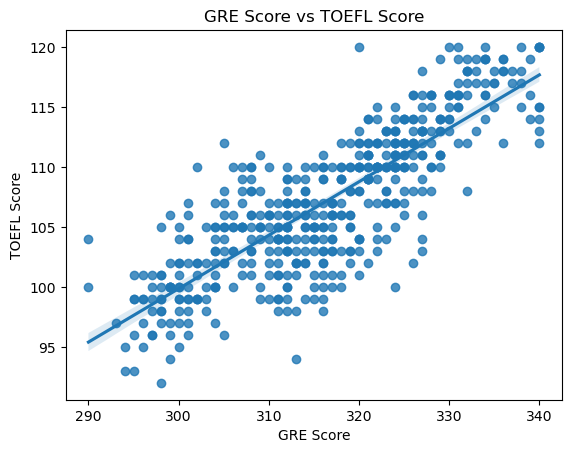

In [137]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

higher the GRE Score, higher the TOEFL Score because both TOEFL and GRE have a verbal section

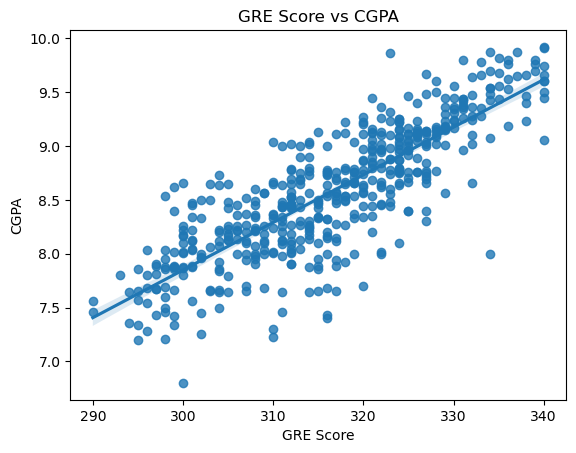

In [138]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

exceptions : people with higher CGPA usually have higher GRE scores 

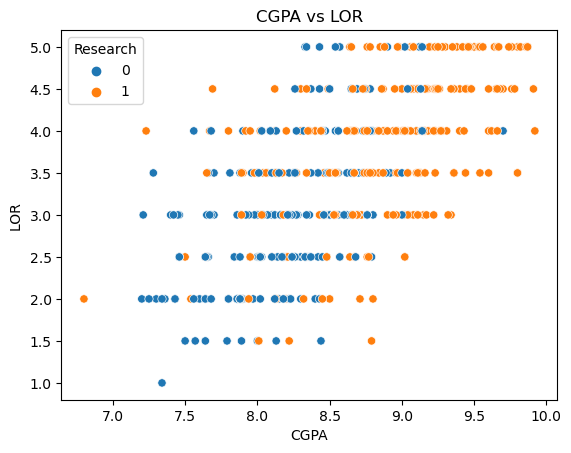

In [139]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

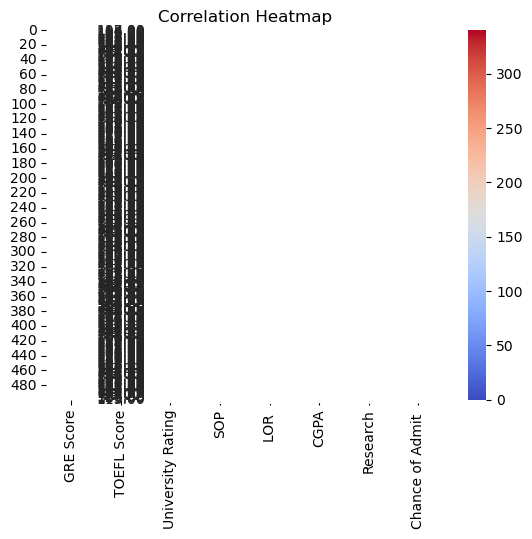

In [140]:
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: ylabel='Density'>

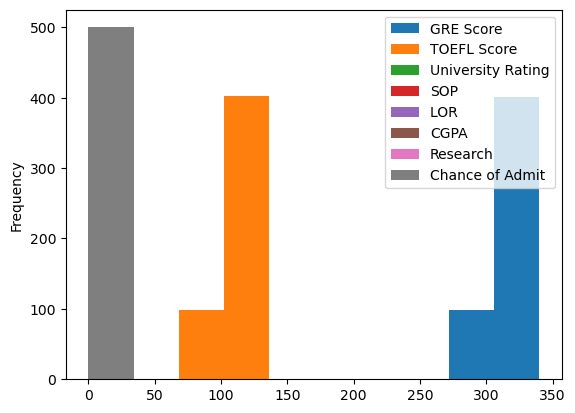

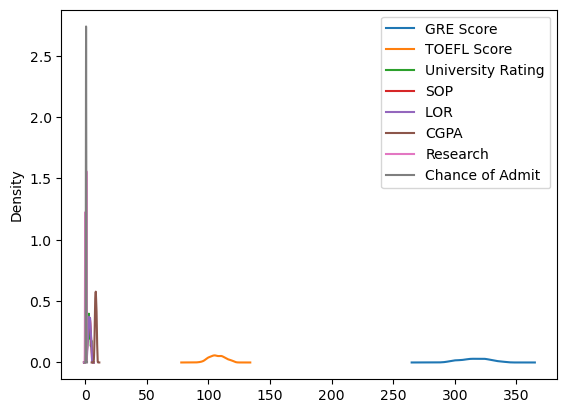

In [141]:
# Histogram
df.plot(kind='hist', bins=10)  # Adjust the number of bins as needed

# Density plot
df.plot(kind='density')

<Axes: >

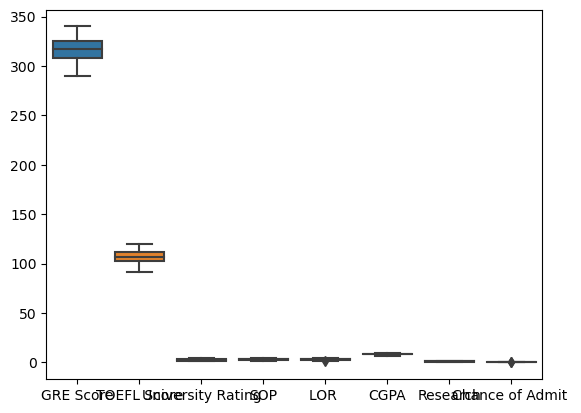

In [142]:
sns.boxplot(df) #finding outliers using boxplot

<Axes: >

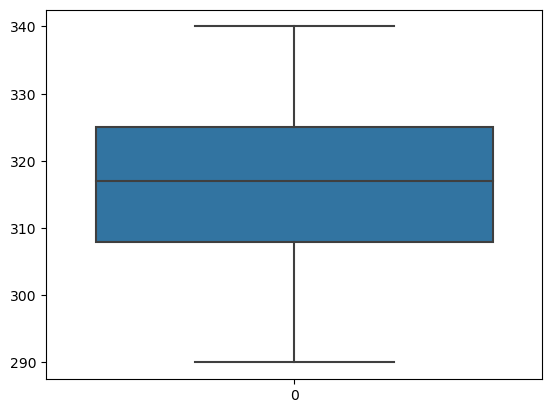

In [143]:
sns.boxplot(df["GRE Score"])

<Axes: >

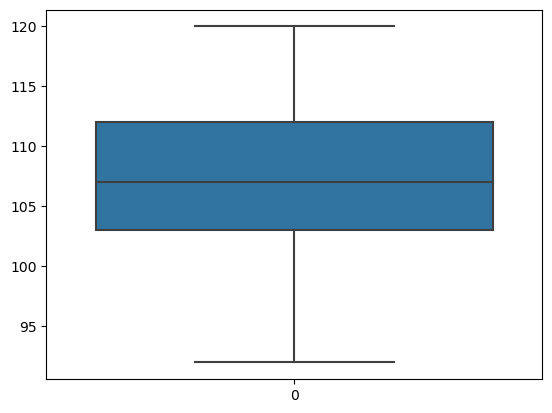

In [144]:
sns.boxplot(df["TOEFL Score"])

<Axes: >

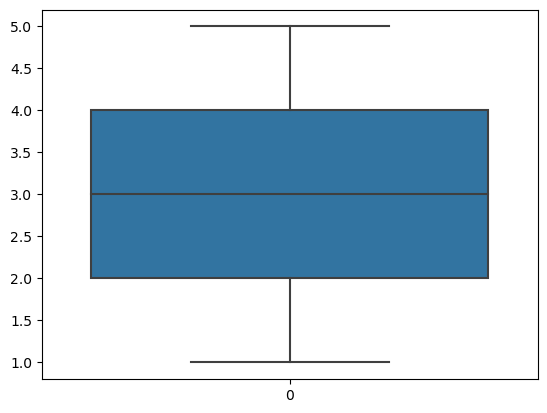

In [145]:
sns.boxplot(df["University Rating"])

<Axes: >

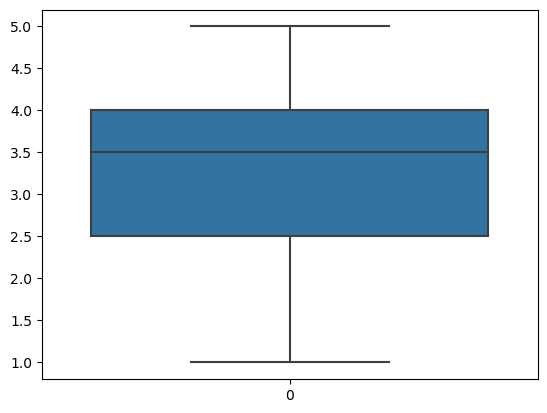

In [146]:
sns.boxplot(df["SOP"])

In [147]:
sns.boxplot(df["LOR"])

KeyError: 'LOR'

<Axes: >

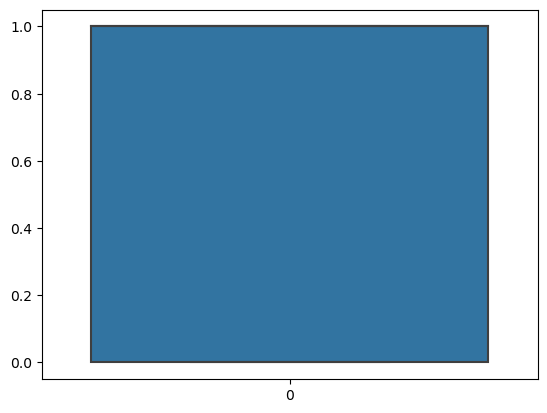

In [148]:
sns.boxplot(df["Research"])

<Axes: >

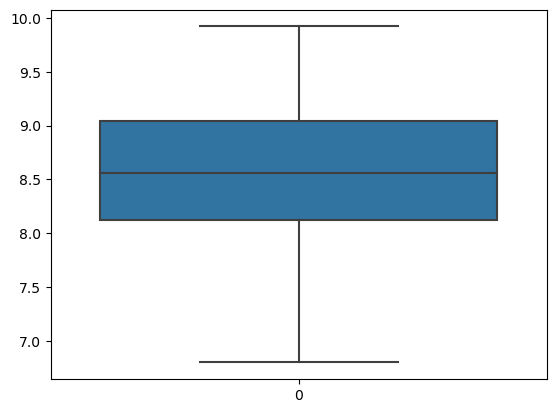

In [149]:
sns.boxplot(df["CGPA"])

from all the boxplot we can see that there is no outliers present in the dataset

# Applying Logistic Regression Model

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [151]:
df1 = df.copy()

In [152]:
X = df1.drop(columns=['Chance of Admit '],axis =1)
y = df1['Chance of Admit ']

In [153]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [154]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

## Applying Train Test Split 

In [155]:
# Splitting the data into test and train
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=100,test_size=0.20)

In [156]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [157]:
#label Encoding
# Converting Target variable to binary
# Accepctance percentage is 80%

ytrain_b = [ 1 if i > 0.80 else 0 for i in ytrain]
ytest_b = [ 1 if i > 0.80 else 0 for i in ytest]

In [158]:
#Using Logistic regression to predict the graduate admissions

lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain_b)

LogisticRegression()

In [159]:
y_pred = lr_model.predict(xtest)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [160]:
print(classification_report(ytest_b,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.90      0.80      0.85        35

    accuracy                           0.90       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100



Our accuracy score of about 88% which means the LogisticRegression model predicts the graduate admission with 90% accuracy.

## Generating Feature Importance

In [161]:
# Extract coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Sort the features by their absolute coefficient values in descending order
feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance DataFrame
print(feature_importance_df)

             Feature  Importance
5               CGPA    2.714356
6           Research    2.483165
2  University Rating    1.232014
3                SOP    0.287923
1        TOEFL Score    0.202477
4               LOR     0.183619
0          GRE Score    0.169290


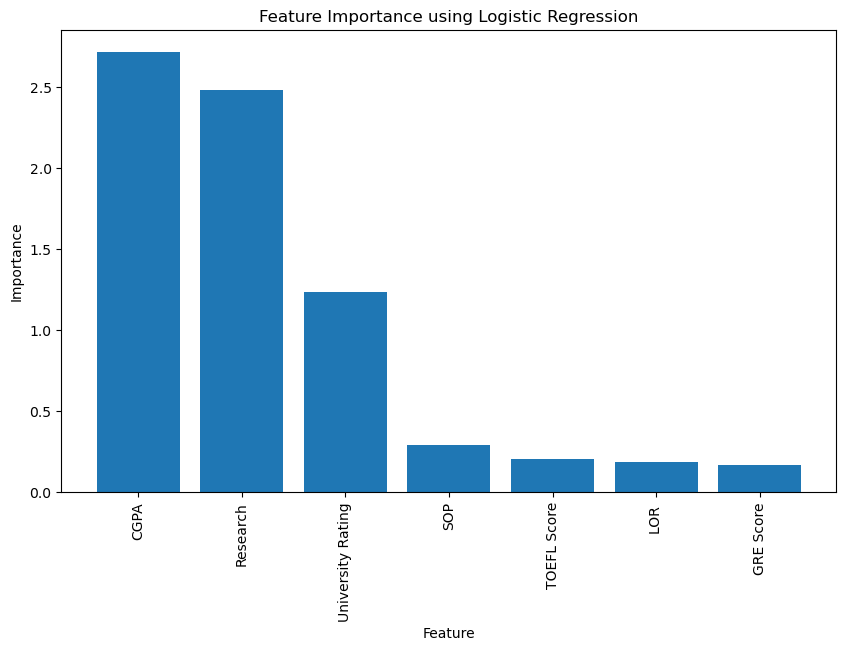

In [162]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Logistic Regression')
plt.show()